In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential,Model,initializers,layers,Input
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [9]:
dir=r'D:\dataset\butterfly\train'

In [24]:
walk=os.walk(dir)
walk=list(walk)
walk
# image_count = []
# for (root, dirs, files) in os.walk(dir):

#     if len(files) > 0:
#         for file_name in files:
#             # print("file: " + file_name)
#             save_file_name = os.path.join(root, file_name)
#             image_count.append(save_file_name)

# print(len(image_count))
# image_count[0]



[('D:\\dataset\\butterfly\\train',
  ['ADONIS',
   'AFRICAN GIANT SWALLOWTAIL',
   'AMERICAN SNOOT',
   'AN 88',
   'APPOLLO',
   'ARCIGERA FLOWER MOTH',
   'ATALA',
   'ATLAS MOTH',
   'BANDED ORANGE HELICONIAN',
   'BANDED PEACOCK'],
  []),
 ('D:\\dataset\\butterfly\\train\\ADONIS',
  [],
  ['01.jpg',
   '02.jpg',
   '03.jpg',
   '04.jpg',
   '05.jpg',
   '06.jpg',
   '07.jpg',
   '08.jpg',
   '09.jpg',
   '10.jpg',
   '100.jpg',
   '101.jpg',
   '102.jpg',
   '103.jpg',
   '104.jpg',
   '105.jpg',
   '106.jpg',
   '107.jpg',
   '108.jpg',
   '109.jpg',
   '11.jpg',
   '110.jpg',
   '111.jpg',
   '112.jpg',
   '113.jpg',
   '114.jpg',
   '115.jpg',
   '116.jpg',
   '117.jpg',
   '118.jpg',
   '119.jpg',
   '12.jpg',
   '120.jpg',
   '121.jpg',
   '122.jpg',
   '123.jpg',
   '124.jpg',
   '125.jpg',
   '126.jpg',
   '127.jpg',
   '13.jpg',
   '14.jpg',
   '15.jpg',
   '16.jpg',
   '17.jpg',
   '18.jpg',
   '19.jpg',
   '20.jpg',
   '21.jpg',
   '23.jpg',
   '24.jpg',
   '25.jpg',
   '

In [35]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
labels="inferred",
label_mode="int",
class_names=None,
color_mode="rgb",
batch_size=32,
image_size=(224, 224),
shuffle=True,
seed=10,
validation_split=0.1,
subset='training',
interpolation="gaussian",
follow_links=False,
crop_to_aspect_ratio=False,)

Found 1257 files belonging to 10 classes.
Using 1132 files for training.


In [36]:
validation_ds=tf.keras.preprocessing.image_dataset_from_directory(
dir,
validation_split=0.1,
subset='validation',
shuffle=True,
seed=10,
image_size=(224,224),
batch_size=32)

Found 1257 files belonging to 10 classes.
Using 125 files for validation.


In [ ]:
train_ds1=list(train_ds)
train_ds1

In [46]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)

In [50]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

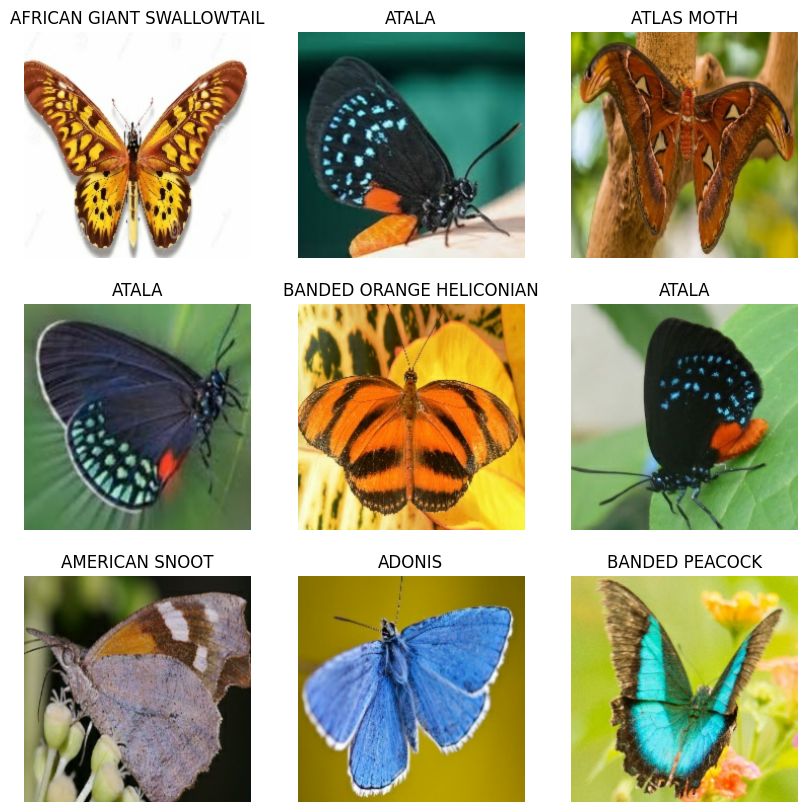

In [49]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [57]:
def Convblock(x,k):
    x1=layers.BatchNormalization()(x)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=4*k,kernel_size=(1,1),strides=(1,1),padding='same')(x1)
    
    x1=layers.BatchNormalization()(x1)
    x1=layers.ReLU()(x1)
    x1=layers.Conv2D(filters=k,kernel_size=(3,3),strides=(1,1),padding='same')(x1)
    
    x2=tf.keras.layers.Concatenate()([x,x1])

    return x2

def DenseBlock_1(x,k):
    for i in range(6):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_2(x,k):
    for i in range(12):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_3(x,k):
    for i in range(48):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def DenseBlock_4(x,k):
    for i in range(32):
        x_temp=Convblock(x,k)
        x=x_temp
    return x

def Transition_layer(x,k,theta):
    x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.Conv2D(filters=(256+3*k)*theta,kernel_size=(1,1),use_bias=False,strides=(1,1),padding='same',)(x)
    x=layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(x)
    return x

def Classification_layer(x):
    x=layers.GlobalAveragePooling2D()(x)
    x=layers.Dense(units=10,activation='softmax')(x)
    return x

In [58]:
input=Input(shape=(224,224,3))
x=layers.BatchNormalization()(input)
x=layers.ReLU()(x)
x=layers.Conv2D(filters=256,kernel_size=(7,7),strides=(2,2),padding='same')(x)
x=layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

x=DenseBlock_1(x,32)
x=Transition_layer(x,32,0.5)

x=DenseBlock_2(x,32)
x=Transition_layer(x,32,0.5)

x=DenseBlock_3(x,32)
x=Transition_layer(x,32,0.5)

x=DenseBlock_4(x,32)

output=Classification_layer(x)

model = tf.keras.models.Model(input,output)

In [4]:
len(model.layers)
#ReLU레이어 제외시 507개 레이어

705

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_200 (Batch  (None, 224, 224, 3)  12         ['input_2[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 re_lu_200 (ReLU)               (None, 224, 224, 3)  0           ['batch_normalization_200[0][0]']
                                                                                            

In [ ]:
plot_model(model,to_file='DenseNet.png',show_shapes=True)

In [64]:
import tensorflow as tf
import numpy as np

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

# Normalization
x_train=x_train/255.

x_test=x_test/255.

x_train.shape

x_train = tf.image.resize(x_train, [224,224]) 

x_test = tf.image.resize(x_test, [224,224]) 

y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' ,metrics=['acc'])

In [62]:
with tf.device("/device:CPU:0"):
    history=model.fit(train_ds,validation_data=validation_ds,epochs=1,batch_size=32,verbose=1)

36/36 [==============================] - 556s 15s/step - loss: 2.2685 - acc: 0.4223 - val_loss: 12840.7539 - val_acc: 0.1120
